<a href="https://colab.research.google.com/github/GrandMoff100/MiscColabNotebooks/blob/main/SmileyFaceRBFKernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import random
import itertools
import pandas as pd
from typing import Any

In [2]:
SIZE = 1000
RADIUS = 1000
CENTER = (400, 400)

In [3]:
# Generate Radial Data (Smiley Face)
from __future__ import annotations


def inside_circle(x: float, y: float, h: float, k: float, r: float) -> bool:
    return (x - h) ** 2 + (y - k) ** 2 <= r ** 2


class Parent:
    name: str
    color: str

    def __init__(self, radius: float, center: tuple[float, float]) -> None:
        self.radius = radius
        self.center = center

    def __contains__(self, obj: Any) -> bool:
        raise NotImplementedError()


class LeftEye(Parent):
    name: str = "left_eye"
    color: str = "#00ff00"

    def __contains__(self, obj: Any) -> bool:
        assert isinstance(obj, tuple) and len(obj) == 2
        x, y = obj
        a, b = self.center
        return inside_circle(
            x,
            y,
            a - 0.5 * self.radius * math.cos(0.2 * math.pi),
            b + 0.5 * self.radius * math.sin(0.2 * math.pi),
            0.15 * self.radius
        )
            

class RightEye(Parent):
    name: str = "right_eye"
    color: str = "#ff0000"

    def __contains__(self, obj: Any) -> bool:
        assert isinstance(obj, tuple) and len(obj) == 2
        x, y = obj
        a, b = self.center
        return inside_circle(
            x,
            y,
            a + 0.5 * self.radius * math.cos(0.2 * math.pi),
            b + 0.5 * self.radius * math.sin(0.2 * math.pi),
            0.15 * self.radius
        )


class Border(Parent):
    name: str = "border"
    color: str = "#000000"

    def __contains__(self, obj: Any) -> bool:
        assert isinstance(obj, tuple) and len(obj) == 2
        x, y = obj
        a, b = self.center
        return (0.9 * self.radius) ** 2 <= (x - a) ** 2 + (y - b) ** 2 <= (1.1 * self.radius) ** 2


class Mouth(Parent):
    name: str = "mouth"
    color: str = "#0000ff"

    def __contains__(self, obj: Any) -> bool:
        assert isinstance(obj, tuple) and len(obj) == 2
        x, y = obj
        a, b = self.center
        return (1.4 * self.radius) ** 2 <= (x - a) ** 2 + (y - b - self.radius) ** 2 and (x - a) ** 2 + (y - b) ** 2 <= (.7 * self.radius) ** 2


points = {
    LeftEye(RADIUS, CENTER): [],
    RightEye(RADIUS, CENTER): [],
    Mouth(RADIUS, CENTER): [],
    Border(RADIUS, CENTER): [],
}

while sum(map(len, points.values())) < SIZE:
    theta = math.tau * random.random()
    radius = 1.1 * RADIUS * random.random()
    point = (radius * math.cos(theta) + CENTER[0], radius * math.sin(theta) + CENTER[1])
    for key in points:
        if point in key:
           points[key].append((*point, key.name, key.color))


smiley_df = pd.DataFrame(
    itertools.chain(*points.values()),
    columns=["x", "y", "facial_feature", "color"]
)


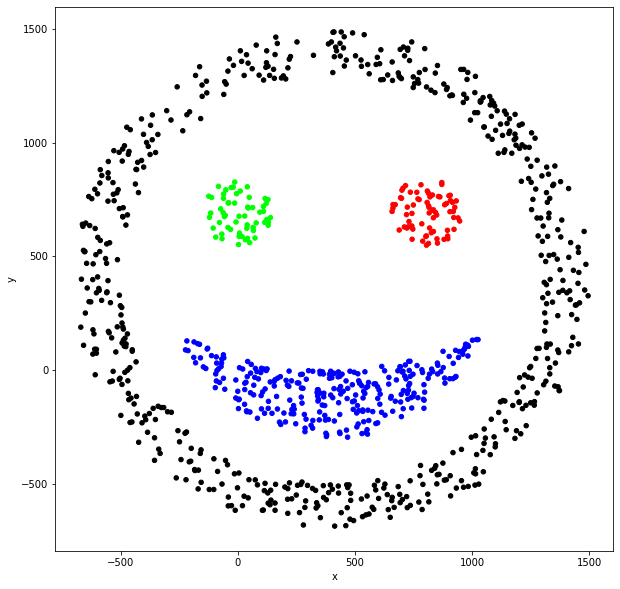

In [4]:
smiley_df.plot.scatter("x", "y", c="color", figsize=(10, 10))

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    smiley_df[["x", "y"]],
    smiley_df["facial_feature"],
    test_size=0.2,
    random_state=42
)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for kernel in ["rbf", "poly", "linear"]: 
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(kernel, accuracy_score(y_test, y_pred))

rbf 1.0
poly 0.585
